   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

П

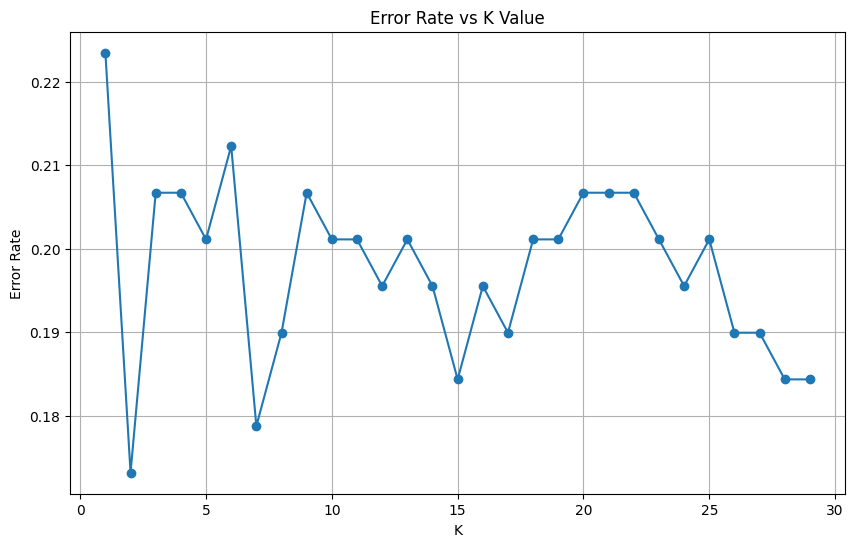


Confusion Matrix для K=10:
 [[93 12]
 [24 50]]

Classification Report для K={optimal_k}:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.799


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# === 1. Завантаження даних ===
url = 'https://drive.google.com/uc?id=1zyYJMa75UXLjmODPRnl4_UrLJ0JKmEOC'
titanic_data = pd.read_csv(url)
print(titanic_data.head())

# === 2. Попередня обробка даних ===
# Видаляємо непотрібні колонки
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

# Заповнюємо пропущені значення правильно
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')

# Перетворюємо категоріальні змінні в числа
titanic_data['Sex'] = LabelEncoder().fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = LabelEncoder().fit_transform(titanic_data['Embarked'])

print("\nПісля обробки:")
print(titanic_data.head())

# === 3. Розділення даних на тренувальні та тестові ===
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 4. Масштабування даних ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 5. Навчання KNN моделі (початково k=5) ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# === 6. Оцінка моделі ===
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

# === 7. Вибір оптимального значення K ===
error_rate = []
for k in range(1, 30):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_scaled, y_train)
    pred_k = knn_k.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# === 8. Навчання KNN з оптимальним K (наприклад, k=10) ===
optimal_k = 10
knn_opt = KNeighborsClassifier(n_neighbors=optimal_k)
knn_opt.fit(X_train_scaled, y_train)
y_pred_opt = knn_opt.predict(X_test_scaled)

print(f"\nConfusion Matrix для K={optimal_k}:\n", confusion_matrix(y_test, y_pred_opt))
print("\nClassification Report для K={optimal_k}:\n", classification_report(y_test, y_pred_opt))
print("Accuracy:", round(accuracy_score(y_test, y_pred_opt), 3))
